# LSTM Model for Temperature Prediction for an Home Automated System

In [2]:
#Import the libraries
import math
import os
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import time

import keras
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


## Read the Data and perform the necessary data manupilation techniques

In [3]:
df = pd.read_csv('Temp042.csv')

In [4]:
df.head()

,Battery,Mote,Timestamp,Temperature,Time in Dec,Time,Date
0,2.546,42,1.590000e+12,22.2500,1585567613,11:26,03-30-2020
1,2.546,42,1.590000e+12,22.2500,1585567014,11:16,03-30-2020
2,2.546,42,1.590000e+12,22.3125,1585566414,11:06,03-30-2020
3,2.545,42,1.590000e+12,22.3125,1585565813,10:56,03-30-2020
4,2.546,42,1.590000e+12,22.3750,1585564014,10:26,03-30-2020


In [5]:
df["Time"] = df["Date"].astype(str)+ ' ' + df["Time"].astype(str)

## Plotting the Rough Data

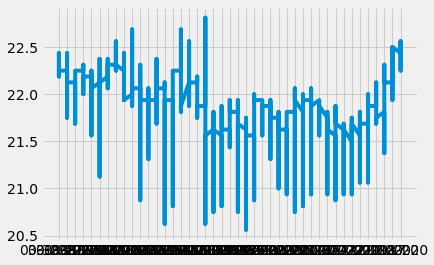

<Figure size 720x432 with 0 Axes>

In [6]:
plt.plot(df['Date'],df['Temperature'])
plt.figure(figsize=(10,6))
plt.show()

In [22]:
df.head()

,Battery,Mote,Timestamp,Temperature,Time in Dec,Time,Date
0,2.546,42,1.590000e+12,22.2500,1585567613,03-30-2020 11:26,03-30-2020
1,2.546,42,1.590000e+12,22.2500,1585567014,03-30-2020 11:16,03-30-2020
2,2.546,42,1.590000e+12,22.3125,1585566414,03-30-2020 11:06,03-30-2020
3,2.545,42,1.590000e+12,22.3125,1585565813,03-30-2020 10:56,03-30-2020
4,2.546,42,1.590000e+12,22.3750,1585564014,03-30-2020 10:26,03-30-2020


In [23]:
df.to_csv('temper_42.csv',index=False)

In [24]:
data = pd.read_csv("temper_42.csv")

In [25]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Temperature','Time'])
#Convert the dataframe to a numpy array
dataset = data.values

In [27]:
data['Time'] = pd.to_datetime(data['Time'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  3861 non-null   float64       
 1   Time         3861 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.5 KB


In [29]:
data.to_csv('temperature_42.csv',index=False)

In [30]:
data = pd.read_csv("temperature_42.csv")

In [31]:
data.tail()

,Temperature,Time
3856,22.2500,2020-02-17 22:36:00
3857,22.4375,2020-02-17 22:21:00
3858,22.3750,2020-02-17 22:01:00
3859,22.4375,2020-02-17 21:16:00
3860,22.5625,2020-02-17 21:06:00


In [32]:
data.dropna(inplace=True)

In [33]:
data.set_index(['Time'],inplace=True)

In [34]:
data.tail()

,Temperature
Time,
2020-02-17 22:36:00,22.2500
2020-02-17 22:21:00,22.4375
2020-02-17 22:01:00,22.3750
2020-02-17 21:16:00,22.4375
2020-02-17 21:06:00,22.5625


In [35]:
dataset = data.values

## Plotting the Cleaned Data

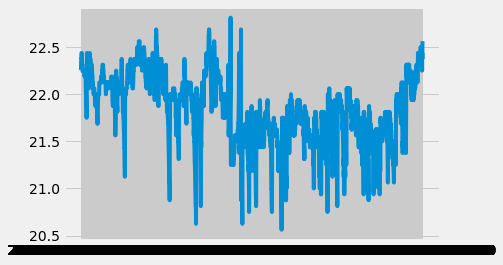

<Figure size 720x432 with 0 Axes>

In [36]:
plt.plot(data['Temperature'])
plt.figure(figsize=(10,6))
plt.show()

In [37]:
data.size

3861

In [38]:
dataset = data.values
data.head()

,Temperature
Time,
2020-03-30 11:26:00,22.2500
2020-03-30 11:16:00,22.2500
2020-03-30 11:06:00,22.3125
2020-03-30 10:56:00,22.3125
2020-03-30 10:26:00,22.3750


## Scale the data to the necessary format and split it for testing and training

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

3089

In [40]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.75      , 0.75      , 0.77777778, 0.77777778, 0.80555556,
       0.80555556, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.80555556, 0.80555556, 0.77777778,
       0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.72222222, 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.72222222, 0.72222222, 0.72222222, 0.72222222,
       0.72222222, 0.69444444, 0.69444444, 0.66666667, 0.63888889,
       0.63888889, 0.63888889, 0.61111111, 0.58333333, 0.58333333])]
[0.5833333333333339]

[array([0.75      , 0.75      , 0.77777778, 0.77777778, 0.80555556,
       0.80555556, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.805

In [41]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3029, 60, 1)

## Load the model, complie and run it.

In [43]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
3029/3029 [==============================] - 204s 67ms/step - loss: 0.0052


In [46]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [47]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [48]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## Run the predictions to test the model

In [49]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.11393987919502364

## Plot the predicted data and test the validation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


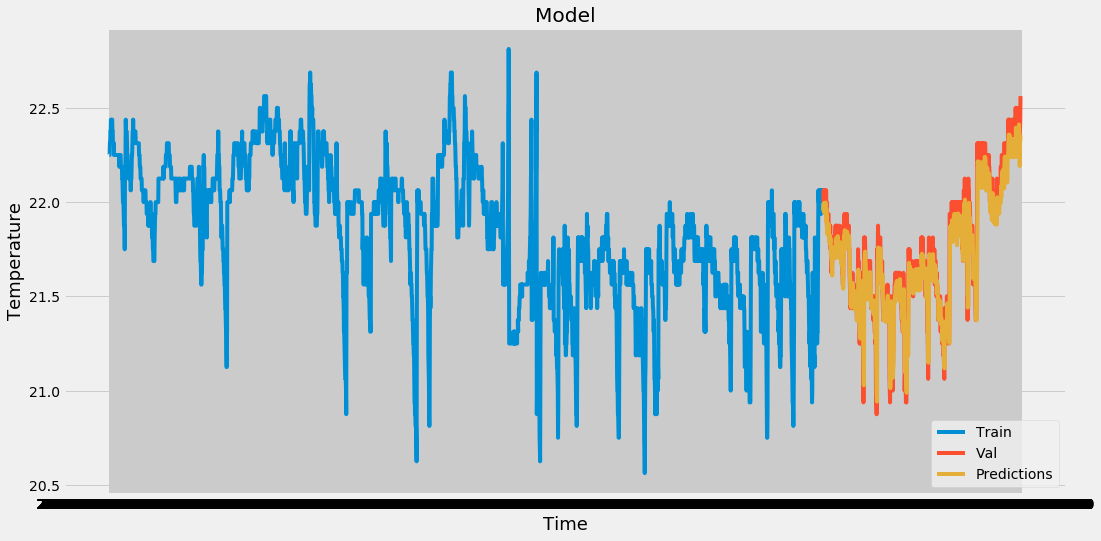

In [51]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.plot(train['Temperature'])
plt.plot(valid[['Temperature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
valid 

,Temperature,Predictions
Time,,
2020-02-28 04:17:00,22.0000,21.995577
2020-02-28 04:12:00,22.0625,21.955082
2020-02-28 04:02:00,22.0625,21.982443
2020-02-28 03:57:00,22.0000,21.995674
2020-02-28 03:47:00,22.0000,21.955751
...,...,...
2020-02-17 22:36:00,22.2500,22.263664
2020-02-17 22:21:00,22.4375,22.191349
2020-02-17 22:01:00,22.3750,22.317930


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


## Convert the model from .h5 format to a .tflite model

In [55]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

In [56]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("temp_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("temp_model.tflite")
print("Model is %d bytes" % basic_model_size)

TypeError: call() got an unexpected keyword argument 'training'

In [57]:
model.save('temp_pred.h5')

In [58]:
from keras.models import load_model

In [59]:
new_model = load_model('temp_pred.h5')

In [60]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [61]:
new_model.get_weights()

[array([[ 0.17960396,  0.24245562,  0.02859803,  0.07947631, -0.13996063,
          0.08334837,  0.0861617 ,  0.12171412,  0.12191004,  0.21391305,
          0.00505891,  0.01716155, -0.12772658,  0.30804923,  0.01985425,
         -0.04098348,  0.2058047 , -0.04905259, -0.00820477, -0.14812143,
         -0.12031093, -0.10108267, -0.08869906,  0.06543139,  0.10805088,
          0.01443182,  0.09110314,  0.08092936,  0.10313232,  0.12612912,
         -0.0789285 ,  0.15349479,  0.22488748,  0.05798439,  0.11017999,
          0.28639928,  0.12601012,  0.11477637,  0.00839205,  0.12256714,
          0.16848052,  0.16309448,  0.07156315, -0.0264748 ,  0.09490772,
         -0.09333867,  0.09944966,  0.11595188,  0.1628993 ,  0.152134  ,
          0.05225489,  0.11764526,  0.11733533,  0.07284453, -0.0846601 ,
          0.02937832,  0.11620616,  0.12841296,  0.04894099, -0.11434389,
          0.13960409,  0.11234027, -0.15636604, -0.09974705, -0.17979851,
          0.00137049, -0.16812833, -0.

In [62]:
new_model.optimizer

In [63]:
import tensorflow as tf

model = tf.keras.models.load_model('temp_pred.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

ConverterError: See console for info.
2020-05-25 16:42:16.494355: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-05-25 16:42:16.495183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "c:\users\vivek vivian\appdata\local\programs\python\python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\vivek vivian\appdata\local\programs\python\python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\vivek vivian\AppData\Local\Programs\Python\Python37\Scripts\toco_from_protos.exe\__main__.py", line 7, in <module>
  File "C:\Users\vivek vivian\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\lite\toco\python\toco_from_protos.py", line 93, in main
    app.run(main=execute, argv=[sys.argv[0]] + unparsed)
  File "C:\Users\vivek vivian\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\platform\app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "c:\users\vivek vivian\appdata\local\programs\python\python37\lib\site-packages\absl\app.py", line 299, in run
    _run_main(main, args)
  File "c:\users\vivek vivian\appdata\local\programs\python\python37\lib\site-packages\absl\app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "C:\Users\vivek vivian\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\lite\toco\python\toco_from_protos.py", line 37, in execute
    with open(FLAGS.toco_proto_file, "rb") as toco_file:
FileNotFoundError: [Errno 2] No such file or directory: 'vivian\\AppData\\Local\\Temp\\tmppig2hay5'




In [64]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('temp_pred.h5') 
model = converter.convert()
file = open( 'model.tflite' , 'wb' )
file.write( model )

AttributeError: type object 'TFLiteConverterV2' has no attribute 'from_keras_model_file'